In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the  universal bank dataset

bankdata = pd.read_csv(r"D:\iiit notes\Internship\11-seasion 25-May-2021\Universalbank.csv", header = 0)
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Count the target or dependent variable by '0' & '1' and their propertion
# (> 10 : 1, then the dataset is imbulance data)

CreditCard_count = bankdata.CreditCard.value_counts()
print('class 0:', CreditCard_count[0])
print('class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(bankdata))

class 0: 3530
class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [5]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']


In [6]:
bankdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
# identify independent and Target variable

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [8]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [9]:
# To build the decision tree model with random sampling
from sklearn.tree import DecisionTreeClassifier
bankdatadc = DecisionTreeClassifier()
bankdatadc = bankdatadc.fit(x_train,y_train)

In [10]:
# To display the algorithm paramaters

params1 = bankdatadc.get_params()
print(params1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [11]:
# Predict the model with test data set

y_pred = bankdatadc.predict(x_test)

In [12]:
# Display confusion matrix and classifiction report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[766 285]
 [292 157]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1051
           1       0.36      0.35      0.35       449

    accuracy                           0.62      1500
   macro avg       0.54      0.54      0.54      1500
weighted avg       0.61      0.62      0.61      1500



In [13]:
# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y_pred) * 100, 2)), "%")

# Model Recall: what percentage of positive tuples are labelled as such?
print("f1-score:", (round(metrics.f1_score(y_test, y_pred) * 100, 2)), '%')

# Area under ROC curve
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Accuracy: 61.53 %
Precision: 35.52 %
Recall: 34.97 %
f1-score: 35.24 %
roc_auc_score: 0.539


In [14]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Feature: 0, Score: 0.12142
Feature: 1, Score: 0.13197
Feature: 2, Score: 0.25748
Feature: 3, Score: 0.05300
Feature: 4, Score: 0.12331
Feature: 5, Score: 0.03598
Feature: 6, Score: 0.10012
Feature: 7, Score: 0.00947
Feature: 8, Score: 0.01568
Feature: 9, Score: 0.08940
Feature: 10, Score: 0.06216


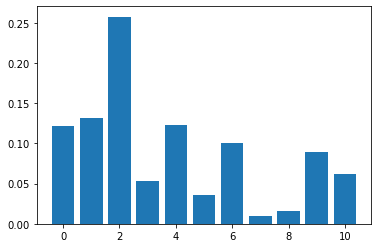

In [15]:
# get importance
from matplotlib import pyplot
importance = bankdatadc.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()